# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.stats import pointbiserialr
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import joblib
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay, f1_score

# Data Loading

In [2]:
imported_data = pd.read_excel('Interview_data_set_gene_exp_sythentic_data_candidates.xlsx', sheet_name= 'Data')

In [3]:
imported_data.head()

,Disease_state,Age,Sex,Physical_activity,Mental_wellbeing,Var_X100000,Var_X100001,Var_X100002,Var_X100003,Var_X100004,...,Var_X100255,Var_X100256,Var_X100257,Var_X100258,Var_X100259,Var_X100260,Var_X100261,Var_X100262,Var_X100263,Var_X100264
0,Familial_hypercholesterolemia,28,Female,Sedentary,Poor,1.360160,0.030116,0.747095,1.661465,0.434667,...,0.720131,1.962250,0.761477,0.478506,0.832663,0.870216,2.341985,0.391669,-1.075727,0.467369
1,Familial_hypercholesterolemia,20,Male,Sedentary,Poor,1.819418,1.743250,2.302410,2.059035,2.479471,...,1.535071,2.036048,0.730948,-0.045124,0.987104,1.811872,2.569236,1.948865,1.282326,0.919973
2,Familial_hypercholesterolemia,79,Male,Sedentary,Poor,1.856348,1.362939,1.767173,1.740018,1.534536,...,1.145936,1.193780,0.545182,-0.211529,1.016802,1.312096,2.355822,1.798541,0.181833,0.601182
3,Familial_hypercholesterolemia,35,Male,Light intensity,Fair,1.904581,2.196192,2.590662,1.885223,2.490902,...,1.512613,2.043382,0.464402,0.555012,0.291832,2.100558,1.971800,2.168909,1.521835,1.151861
4,Familial_hypercholesterolemia,46,Male,Vigorous intensity,Fair,1.913574,0.951858,1.343247,1.910109,0.265609,...,0.798619,1.431647,1.186902,0.832427,0.467380,1.385796,2.244478,1.293610,-0.063512,0.659144


# Data Exploration

This section will go through some initial exploration of the data as is. It will address two of the director’s asks: which gene variants might be most influential and how demographic & self-reported health measures correlate with the disease.

In [4]:
raw_data = imported_data.copy()

### Numerical Features

In [5]:
raw_data.describe()

,Age,Var_X100000,Var_X100001,Var_X100002,Var_X100003,Var_X100004,Var_X100005,Var_X100006,Var_X100007,Var_X100008,...,Var_X100255,Var_X100256,Var_X100257,Var_X100258,Var_X100259,Var_X100260,Var_X100261,Var_X100262,Var_X100263,Var_X100264
count,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,...,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000
mean,50.143426,2.706177,2.248176,2.483213,2.308567,2.106787,2.750460,2.273741,1.779848,2.502444,...,1.470707,1.647513,0.936416,0.639329,1.066499,2.111452,2.219303,2.093933,1.223292,0.881793
std,16.892834,0.343680,0.316670,0.316393,0.296052,0.328476,0.346972,0.379903,0.341473,0.333680,...,0.129631,0.201906,0.264254,0.458070,0.250343,0.189014,0.150415,0.163038,0.249683,0.073678
min,4.000000,1.360160,0.030116,0.747095,1.152706,0.250401,1.762087,0.471531,-0.437249,1.591790,...,0.340235,0.782003,-0.283451,-0.456383,0.087963,0.870216,1.550020,0.298022,-1.075727,0.467369
25%,38.000000,2.426286,2.004610,2.230944,2.078092,1.860158,2.462559,2.008862,1.550120,2.249400,...,1.403207,1.523081,0.774206,0.274397,0.912879,1.998881,2.135521,2.015324,1.115497,0.835525
50%,52.000000,2.688863,2.245194,2.484510,2.291399,2.096951,2.735642,2.270003,1.760742,2.495142,...,1.476294,1.642298,0.953264,0.618546,1.096994,2.139447,2.228569,2.106441,1.261091,0.883416
75%,63.000000,2.978024,2.478021,2.728423,2.533082,2.353095,3.027942,2.547027,1.996180,2.756696,...,1.549368,1.769457,1.120548,0.978257,1.239630,2.247820,2.318470,2.188340,1.368438,0.930703
max,95.000000,3.575112,3.232623,3.351368,3.167269,3.264631,3.731052,3.401256,3.147517,3.517079,...,1.880338,2.487849,1.784497,2.054977,1.879617,2.574267,2.693816,2.658966,2.041180,1.151861


This data description may indicate the need for scaling of the genetic variant expression features. This would prevent the dominance of features with a large magnitude and improve convergence speed for certain types of machine learning model. Furthermore, the ‘Age’ feature has a range from 4-95. There is an option to bucket these into discrete intervals (25-30, 30-35, etc.) but this option leads to a loss in granularity. This is a feature of importance to the director so it will be scaled in order to preserve granularity and fully understand its correlation with the disease. 

#### Age

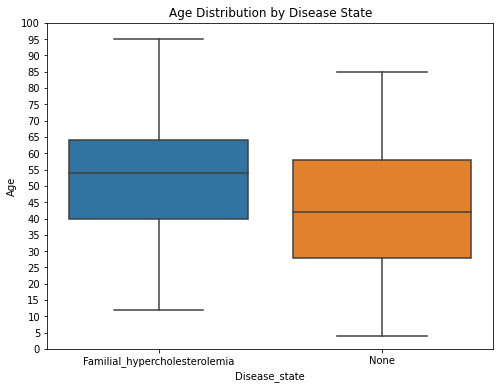

In [6]:
# Creation of the boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Disease_state', y='Age', data=raw_data)

# The y_axis is given its limits and a major incrementation of 5 allowing for easier interpretability
ax.set_ylim(0, 100)
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.title('Age Distribution by Disease State')
plt.ylabel('Age')

plt.show()

### Categorical Features

#### Disease States

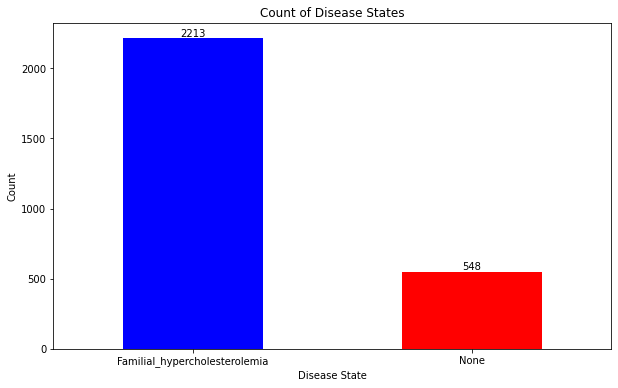

In [7]:
# Get a count from the Disease states target variable
disease_state_counts = raw_data['Disease_state'].value_counts()

#Plotting a bar graph for visualisation purposes
plt.figure(figsize=(10, 6))
bar_plot = disease_state_counts.plot(kind='bar', color=['blue', 'red'])

# This adds data labels on the bars
for index, value in enumerate(disease_state_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.title('Count of Disease States')
plt.xlabel('Disease State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

It is evident from the graph that there is class imbalance in this dataset. This will be addressed in the feature engineering section.

#### Sex

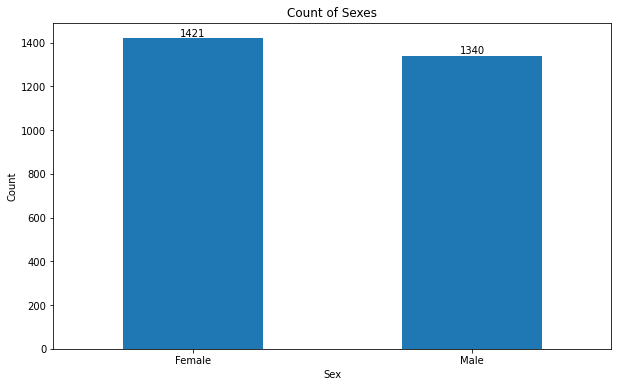

In [8]:
# Get a count from the Sex variable
Sex_counts = raw_data['Sex'].value_counts()

#Plotting a bar graph for visualisation purposes
plt.figure(figsize=(10, 6))
bar_plot = Sex_counts.plot(kind='bar')

# This adds data labels on the bars
for index, value in enumerate(Sex_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.title('Count of Sexes')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
# Here will print the summary statistics for the disease state variable grouped by Sex
summary_stats = raw_data.groupby('Sex')['Disease_state'].describe()
print(summary_stats)

       count unique                            top  freq
Sex                                                     
Female  1421      2  Familial_hypercholesterolemia  1083
Male    1340      2  Familial_hypercholesterolemia  1130


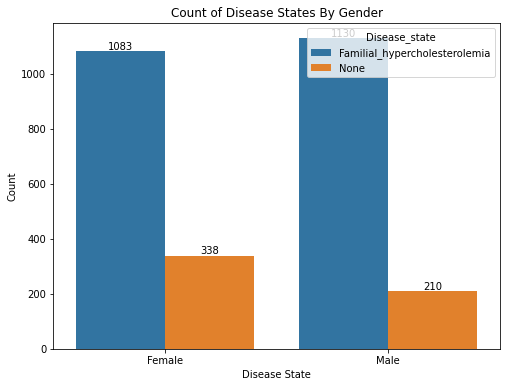

In [10]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue= 'Disease_state', data=raw_data)

# This adds data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Disease States By Gender')
plt.xlabel('Disease State')
plt.ylabel('Count')
plt.show()

#### Physical Activity

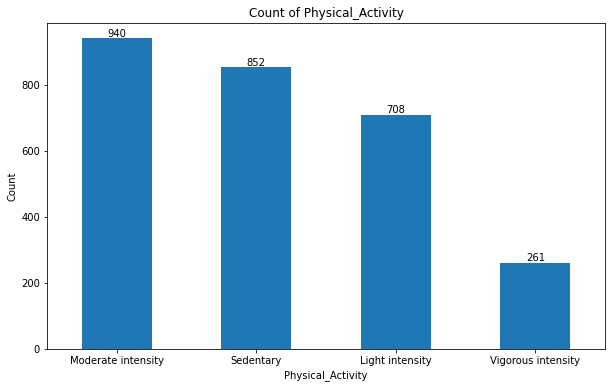

In [11]:
# Get a count from the Physical Activity variable
Physical_Activity_counts = raw_data['Physical_activity'].value_counts()

#Plotting a bar graph for visualisation purposes
plt.figure(figsize=(10, 6))
bar_plot = Physical_Activity_counts.plot(kind='bar')

# This adds data labels on the bars
for index, value in enumerate(Physical_Activity_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.title('Count of Physical_Activity')
plt.xlabel('Physical_Activity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [18]:
raw_data['Physical_activity'].unique()

array(['Sedentary', 'Light intensity', 'Vigorous intensity',
       'Moderate intensity'], dtype=object)

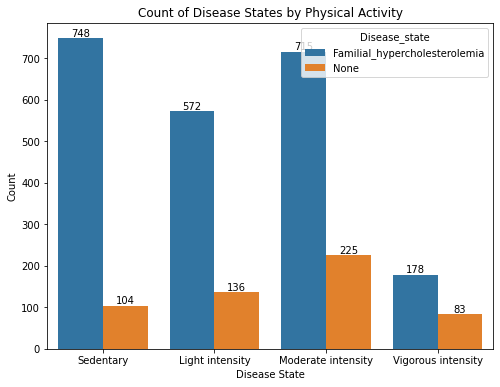

In [19]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Physical_activity', hue= 'Disease_state', data=raw_data, order = ['Sedentary', 'Light intensity','Moderate intensity', 'Vigorous intensity',
       ] )

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Disease States by Physical Activity')
plt.xlabel('Disease State')
plt.ylabel('Count')
plt.show()

#### Mental_wellbeing

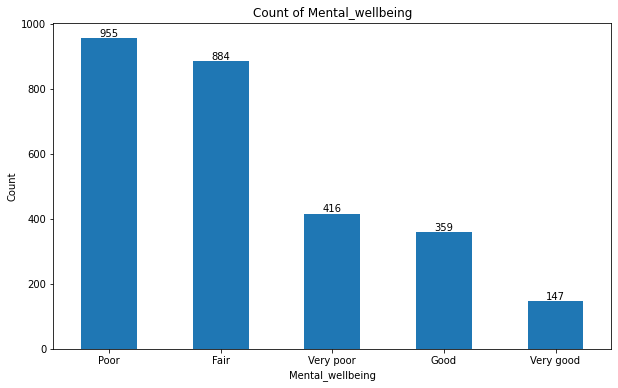

In [21]:
# Get a count from the Mental_wellbeing variable
Mental_wellbeing_counts = raw_data['Mental_wellbeing'].value_counts()

#Plotting a bar graph for visualisation purposes
plt.figure(figsize=(10, 6))
bar_plot = Mental_wellbeing_counts.plot(kind='bar')

# This adds data labels on the bars
for index, value in enumerate(Mental_wellbeing_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.title('Count of Mental_wellbeing')
plt.xlabel('Mental_wellbeing')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

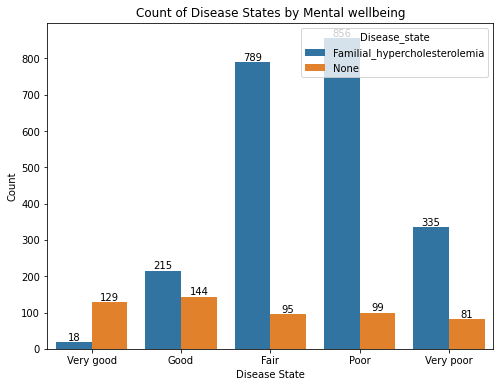

In [23]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Mental_wellbeing', hue= 'Disease_state', data=raw_data, order = ['Very good', 'Good','Fair', 'Poor', 'Very poor'])

# This adds data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Disease States by Mental wellbeing')
plt.xlabel('Disease State')
plt.ylabel('Count')
plt.show()

### Demographic and reported health measures correlation with disease state

To determine these correlations, two statistical tests have been chosen. For the categorical measures, the chi-squared test of independence has been selected. It is commonly used to used test whether two categorical variables are related to each other. For the Age variable, a point biserial correlation has been chosen to examine the relationship between dichotomous variables and metric variables.

#### Sex

In [24]:
# Create a contingency table
sex_contingency_table = pd.crosstab(raw_data['Sex'], raw_data['Disease_state'])
print(sex_contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(sex_contingency_table)


# Significance level is set at 0.05 as this is the most commonly used.
alpha = 0.05

# Compare p-value to significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Sex and Disease state.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Sex and Disease state.")

Disease_state  Familial_hypercholesterolemia  None
Sex                                               
Female                                  1083   338
Male                                    1130   210
Reject the null hypothesis: There is a significant association between Sex and Disease state.


#### Physical_activity

In [25]:
# Create a contingency table
PA_contingency_table = pd.crosstab(raw_data['Physical_activity'], raw_data['Disease_state'])
print(PA_contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(PA_contingency_table)


# Compare p-value to significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between physical activity and Disease state.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between physical activity and Disease state.")

Disease_state       Familial_hypercholesterolemia  None
Physical_activity                                      
Light intensity                               572   136
Moderate intensity                            715   225
Sedentary                                     748   104
Vigorous intensity                            178    83
Reject the null hypothesis: There is a significant association between physical activity and Disease state.


#### Mental_wellbeing

In [26]:
# Create a contingency table
MW_contingency_table = pd.crosstab(raw_data['Mental_wellbeing'], raw_data['Disease_state'])
print(MW_contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(MW_contingency_table)

# Compare p-value to significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between mental wellbeing and Disease state.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between mental wellbeing and Disease state.")

Disease_state     Familial_hypercholesterolemia  None
Mental_wellbeing                                     
Fair                                        789    95
Good                                        215   144
Poor                                        856    99
Very good                                    18   129
Very poor                                   335    81
Reject the null hypothesis: There is a significant association between mental wellbeing and Disease state.


#### Age

In [27]:
# The module only takes binary encoded values so Distate state is encoded to (0 for 'None', 1 for 'Familial_hypercholesterolemia')
raw_data['Disease_state_encoded'] = raw_data['Disease_state'].map({'None': 0, 'Familial_hypercholesterolemia': 1})

In [28]:
# Reorder columns to have 'Disease_state_encoded' as the first column
cols = ['Disease_state_encoded'] + [col for col in raw_data.columns if col != 'Disease_state_encoded']
raw_data = raw_data[cols]

In [29]:
# The scipy point biserial module is used to calculate the point biserial correlation
corr, p_value = pointbiserialr(raw_data['Disease_state_encoded'], raw_data['Age'])

print(f"Point Biserial Correlation: {corr:.2f}")
print(f"p-value: {p_value:.2f}")

# The p-value is set to the common value of 0.05 
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between Age and Disease state.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Age and Disease state.")


Point Biserial Correlation: 0.23
p-value: 0.00
Reject the null hypothesis: There is a significant correlation between Age and Disease state.


# Data Cleaning

In this section, data cleaning was performed on the dataset. This involved checking for missing values, duplicates, and outliers.  There were no missing values or duplicates in the dataset. However there were some outliers detected in the dataset as seen below. Outlier analysis was performed using the z-score method.  Thus, outliers are defined as observations that are ±3 standard deviations away from the mean.  ±3 standard deviations was selected because these values are considered extreme. 


The conclusion reached is that outliers will be retained for the following reasons:

Firstly, after sorting the outliers in descending order, it was observed that the maximum number of outliers in any given feature was 59, which is only 0.02% of the total observations. Given this minimal impact, it was deemed unnecessary to remove them.

Furthermore, robust scaling has been selected as the scaling method. This approach is inherently capable of handling outliers effectively, ensuring that their presence does not adversely affect the scaled data.

In [30]:
# Here a check for missing values in the raw dataset was performed
missing_values = raw_data.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 0


In [31]:
# Here a check for duplicates was performed
duplicates = raw_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [32]:
# Checking for outliers begins with removing the categorical columns
excluded_columns = ['Disease_state', 'Disease_state_encoded', 'Sex', 'Physical_activity', 'Mental_wellbeing']
selected_columns = [col for col in raw_data.columns if col not in excluded_columns]

In [33]:
# Z-scores are then calculated for each of the continous columns
raw_data_zscores = raw_data[selected_columns].apply(zscore)

In [34]:
# The threshold is set at ±3 standard deviations in order to identify outliers
# Values beyond this are considered to be extreme and are likely to be outliers
threshold = 3
outliers = (raw_data_zscores.abs() > threshold)

# Count the number of outliers in each column
outliers_count = outliers.sum()

# To display only the columns with outliers
outliers_count_nonzero = outliers_count[outliers_count > 0]

# For visibility, the columns are sorted by the count of outliers in descending order
sorted_outliers_count = outliers_count_nonzero.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print columns with outliers and their counts in order
print("Columns with outliers and their counts in descending order:")
print(sorted_outliers_count)

Columns with outliers and their counts in descending order:
Var_X100149    59
Var_X100200    54
Var_X100226    54
Var_X100236    51
Var_X100181    43
Var_X100186    43
Var_X100242    39
Var_X100189    37
Var_X100178    36
Var_X100108    36
Var_X100086    36
Var_X100263    35
Var_X100177    35
Var_X100166    33
Var_X100222    32
Var_X100203    32
Var_X100240    32
Var_X100173    32
Var_X100244    32
Var_X100190    30
Var_X100167    30
Var_X100204    29
Var_X100153    28
Var_X100109    28
Var_X100164    27
Var_X100105    27
Var_X100063    27
Var_X100196    27
Var_X100249    27
Var_X100159    26
Var_X100053    26
Var_X100114    26
Var_X100261    26
Var_X100219    25
Var_X100207    25
Var_X100171    25
Var_X100151    25
Var_X100254    25
Var_X100188    25
Var_X100218    25
Var_X100146    24
Var_X100165    24
Var_X100130    24
Var_X100217    24
Var_X100126    24
Var_X100237    24
Var_X100069    24
Var_X100198    24
Var_X100197    24
Var_X100143    24
Var_X100229    24
Var_X100262    24
Var_

# Feature Engineering 

Sci-kit Learn’s Robust Scaler was chosen as the scaling method. This technique uses the median and the interquartile range for scaling, making it robust against datasets with outliers. This approach was particularly suitable given the presence of outliers in the dataset.

Next, dummy variables were created for Sex, Physical Activity, Mental Well-Being, and Disease State. Both mapping and the pandas ‘get_dummies’ method were used to generate these variables.


In [35]:
preprocessed_data = raw_data.copy()

In [36]:
scaler = RobustScaler()

In [37]:
preprocessed_data[selected_columns] = scaler.fit_transform(preprocessed_data[selected_columns])

In [38]:
data_dummies = [pd.get_dummies(preprocessed_data['Sex'], prefix = 'Sex', prefix_sep = ':'),
                pd.get_dummies(preprocessed_data['Physical_activity'], prefix = 'Physical_activity', prefix_sep = ':'),
                pd.get_dummies(preprocessed_data['Mental_wellbeing'], prefix = 'Mental_wellbeing', prefix_sep = ':')]

In [39]:
data_dummies = pd.concat(data_dummies, axis = 1)

In [40]:
preprocessed_data = pd.concat([preprocessed_data, data_dummies], axis = 1)

In [41]:
preprocessed_data = preprocessed_data.drop(columns=['Disease_state', 'Sex', 'Physical_activity', 'Mental_wellbeing'])

#  Model Training and Evaluation

## Data Splitting

In [42]:
# The preprocessed data is split into the target y and independent variables X. 
X = preprocessed_data.drop('Disease_state_encoded', axis=1)
y = preprocessed_data['Disease_state_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classification

In [43]:
rf = RandomForestClassifier(class_weight= 'balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
rf_y_pred = rf.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.933


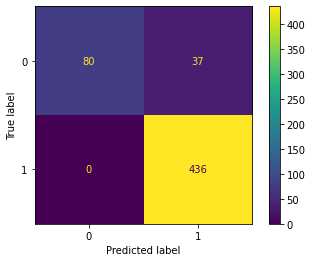

In [46]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [47]:
# The individual components of the confusion matrix are extracted
tn, fp, fn, tp = confusion_matrix(y_test, rf_y_pred).ravel()

# The evaluation metrics are calculated from the confusion matrix
false_positive_rate = fp / (fp + tn)
specificity = tn / (tn + fp)
recall = recall_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)

# Print metrics
print(f"False Positive Rate: {false_positive_rate:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

False Positive Rate: 0.316
Specificity: 0.684
Recall: 1.000
Precision: 0.922
F1 Score: 0.959


## Logistic Regression 

In [48]:
logreg = LogisticRegression(class_weight = 'balanced', random_state=42)
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)

C:\Users\badbo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
accuracy = accuracy_score(y_test, logreg_y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.966


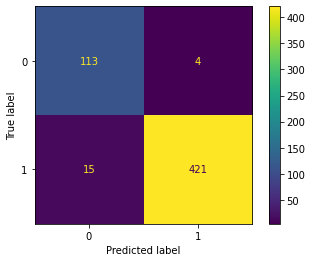

In [50]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, logreg_y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [51]:
# The individual components of the confusion matrix are extracted
tn, fp, fn, tp = confusion_matrix(y_test, logreg_y_pred).ravel()

# The evaluation metrics are calculated from the confusion matrix
false_positive_rate = fp / (fp + tn)
specificity = tn / (tn + fp)
recall = recall_score(y_test, logreg_y_pred)
precision = precision_score(y_test, logreg_y_pred)
f1 = f1_score(y_test, logreg_y_pred)

# Print metrics
print(f"False Positive Rate: {false_positive_rate:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

False Positive Rate: 0.034
Specificity: 0.966
Recall: 0.966
Precision: 0.991
F1 Score: 0.978


## XGBoost

In [52]:
# Compute the ratio of negative to positive samples
ratio_of_negative_to_positive_samples = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train the model
XGBoost_model = XGBClassifier(objective = 'binary:logistic', eval_metric = 'error', scale_pos_weight = ratio_of_negative_to_positive_samples, random_state =42)

In [53]:
XGBoost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
XGBoost_y_pred = XGBoost_model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, XGBoost_y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.976


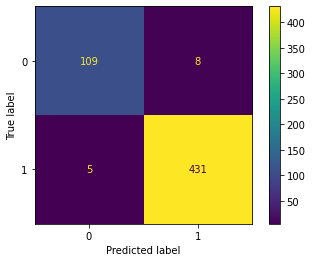

In [56]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, XGBoost_y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [57]:
# The individual components of the confusion matrix are extracted
tn, fp, fn, tp = confusion_matrix(y_test, XGBoost_y_pred).ravel()

# The evaluation metrics are calculated from the confusion matrix
false_positive_rate = fp / (fp + tn)
specificity = tn / (tn + fp)
recall = recall_score(y_test, XGBoost_y_pred)
precision = precision_score(y_test, XGBoost_y_pred)
f1 = f1_score(y_test, XGBoost_y_pred)

# Print metrics
print(f"False Positive Rate: {false_positive_rate:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

False Positive Rate: 0.068
Specificity: 0.932
Recall: 0.989
Precision: 0.982
F1 Score: 0.985


## SVM

In [58]:
#Creating an SVM Classifier from the imported module a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Training the classifier with previously defined training dataset
clf.fit(X_train, y_train)

#Creating predictions using the test data
clf_y_pred = clf.predict(X_test)


In [59]:
accuracy = accuracy_score(y_test, clf_y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.957


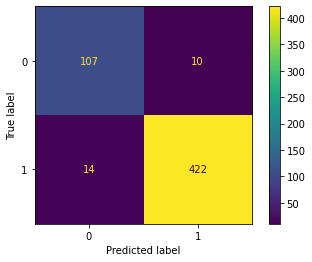

In [60]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, clf_y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [61]:
# The individual components of the confusion matrix are extracted
tn, fp, fn, tp = confusion_matrix(y_test, clf_y_pred).ravel()

# The evaluation metrics are calculated from the confusion matrix
false_positive_rate = fp / (fp + tn)
specificity = tn / (tn + fp)
recall = recall_score(y_test, clf_y_pred)
precision = precision_score(y_test, clf_y_pred)
f1 = f1_score(y_test, clf_y_pred)

# Print metrics
print(f"False Positive Rate: {false_positive_rate:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

False Positive Rate: 0.085
Specificity: 0.915
Recall: 0.968
Precision: 0.977
F1 Score: 0.972


# Hyperparameter Tuning

Due to the class imbalance in the dataset, the F1 score was selected as the primary evaluation metric. The XGBoost model achieved the highest F1 score of 0.985. To explore potential improvements, hyperparameter tuning was conducted using Randomized Search. This method was chosen for its efficiency and cost-effectiveness.

In [62]:
# The list of parameter distributions is defined
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2),
    'scale_pos_weight': [ratio_of_negative_to_positive_samples]
}

In [63]:
# A randomised search is performed 
random_search = RandomizedSearchCV(estimator=XGBoost_model, param_distributions=param_dist,
                                   n_iter=100, scoring='f1', cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_disc

In [64]:
# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score:.4f}")

Best Parameters: {'colsample_bytree': 0.9275114942710427, 'learning_rate': 0.27616382277289797, 'max_depth': 3, 'n_estimators': 150, 'scale_pos_weight': 0.2425436128306134, 'subsample': 0.9943424190778208}
Best F1 Score: 0.9899


In [65]:
best_model = random_search.best_estimator_

# Feature Importance

To evaluate feature importance, fortunately XGBoost provides  a built-in function to plot features ordered by their importance. There is an ‘importance_type’ parameter which lets you select between the arguments gain, weight and cover. Gain is the improvement in accuracy brought by a feature to the branches it is on. Weight or frequency represents the number of times a feature appears in the trees of the model. Cover represents the average coverage of splits which use the feature, where coverage is defined as the number of samples affected by the split. All these parameters are shown below for comprehensive analysis.

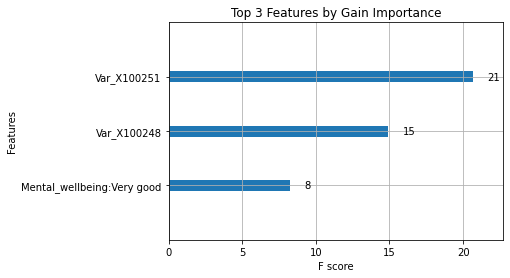

In [70]:
# The plot feature importance using gain
plot_importance(best_model, max_num_features=3, importance_type='gain', values_format= "{v:.0f}")
plt.title("Top 3 Features by Gain Importance")
plt.show()

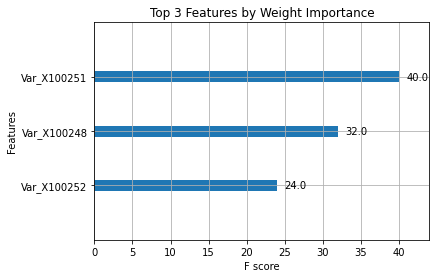

In [71]:
# The plot feature importance using weight/frequency
plot_importance(best_model, max_num_features=3, importance_type='weight')
plt.title("Top 3 Features by Weight Importance")
plt.show()

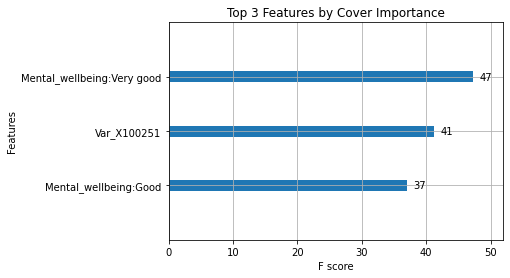

In [72]:
# The plot feature importance using cover
plot_importance(best_model, max_num_features=3, importance_type='cover', values_format= "{v:.0f}")
plt.title("Top 3 Features by Cover Importance")
plt.show()

# Deployment

In [69]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']